In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df = pd.read_csv('Algerian_forest_fires_dataset_CleanedDataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [41]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [42]:
## Removing day, month , and year
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [43]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [44]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [45]:
## Encoding of the categories in Classes
df['Classes'] = np.where(df['Classes'].str.contains('not fire') , 0 , 1)

In [46]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [47]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [48]:
## Independent and Dependent features
X = df.drop('FWI',axis=1)
y = df['FWI']

### Independent Features

In [49]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


### Dependent Feature ( Target )

In [50]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

### Train , Test and Split

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 11)
(61, 11)
(182,)
(61,)


### Feature Selection Based on Correlation

In [53]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


### Check for Multicollinearity

<Axes: >

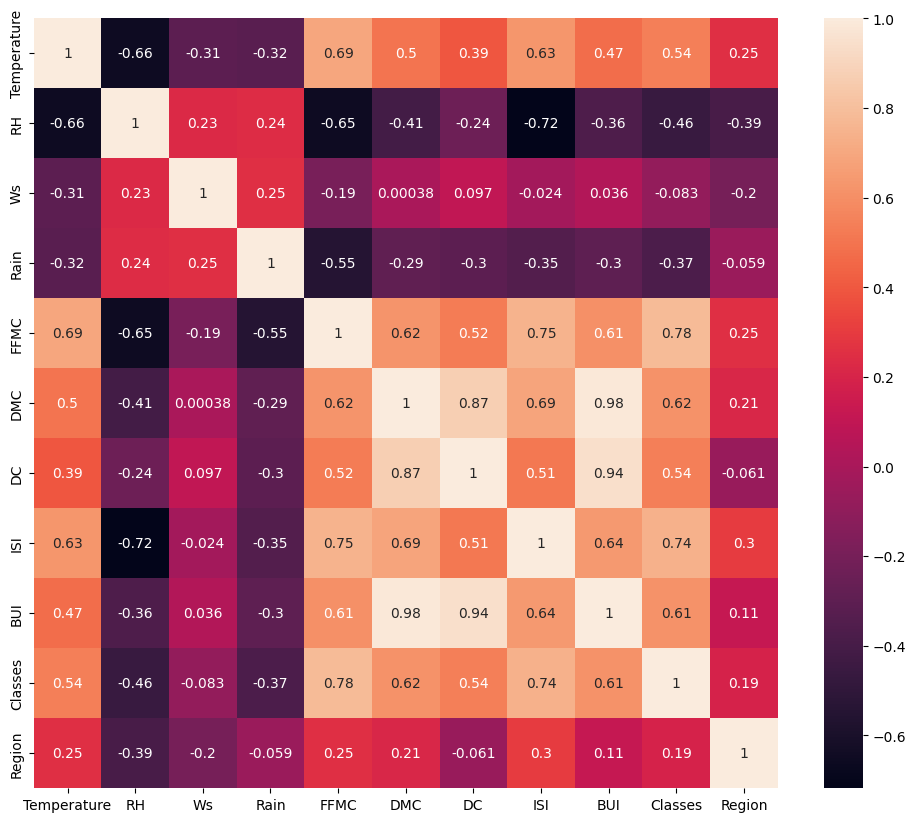

In [54]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [55]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [56]:
## Threshold - Domain Expertise
corr_feature = correlation(X_train,0.85)

In [57]:
## Droping Features when the Correlation is more than 85%
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape , X_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.fit_transform(X_test)

In [59]:
Scaled_X_train 

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

In [60]:
Scaled_X_test

array([[-3.73215184e-01,  1.86526055e-01, -7.56034558e-02,
        -3.93465417e-01,  5.75516485e-01, -2.71484039e-02,
         3.33219559e-01,  8.05387266e-01, -1.01653005e+00],
       [ 2.18112770e-01, -5.15825141e-01, -6.90511563e-01,
        -3.93465417e-01,  6.80353750e-01, -3.98035193e-01,
         5.29474389e-01,  8.05387266e-01, -1.01653005e+00],
       [-1.26020712e+00, -2.34884662e-01,  8.46758705e-01,
         1.07328622e+00, -1.03198825e+00, -9.75928561e-01,
        -9.28418633e-01, -1.24163870e+00,  9.83738754e-01],
       [ 5.13776747e-01, -2.34884662e-01, -6.90511563e-01,
        -2.60124359e-01,  7.22976113e-02,  3.60988933e-01,
        -6.76090995e-01, -1.24163870e+00,  9.83738754e-01],
       [-6.68879162e-01,  2.56761175e-01, -3.83057509e-01,
        -3.93465417e-01,  4.84657521e-01,  1.28106531e-01,
        -3.21729229e-03,  8.05387266e-01,  9.83738754e-01],
       [ 1.99209663e+00,  1.86526055e-01, -1.92032778e+00,
         4.06580931e-01, -3.26083997e-01, -2.427802

### Box plot to understand the effects of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

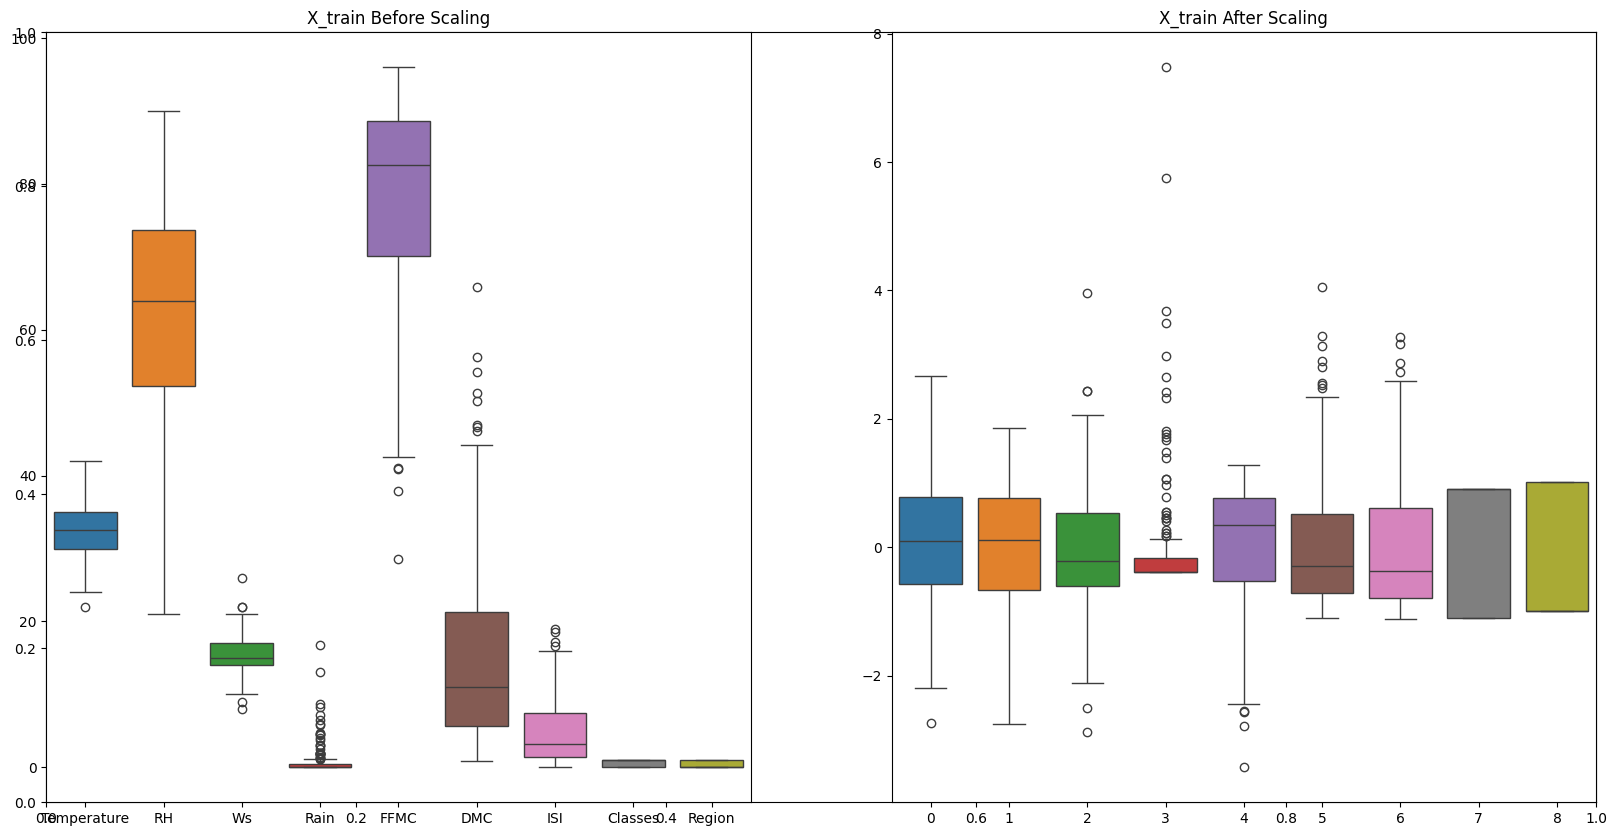

In [61]:
plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=Scaled_X_train)
plt.title('X_train After Scaling')

## Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linearRegression = LinearRegression()

# Train the model
model = linearRegression.fit(Scaled_X_train, y_train)

# Predict on test data (use .predict)
y_pred = linearRegression.predict(Scaled_X_test)

# Evaluate the model
Mean_Absolute_Error = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print('Mean_Absolute_Error ->', Mean_Absolute_Error)
print('R2-Score ->', R2_Score)

Mean_Absolute_Error -> 0.9939450225331379
R2-Score -> 0.9607056657860652


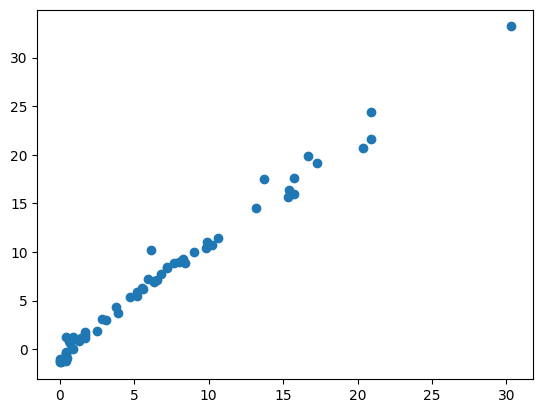

In [63]:
plt.scatter(y_test,y_pred)

A Good Model.

## Lasso Regression Model

In [64]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

LassoRegression = Lasso()

# Train the model
model = LassoRegression.fit(Scaled_X_train, y_train)

# Predict on test data (use .predict)
y_pred = LassoRegression.predict(Scaled_X_test)

# Evaluate the model
Mean_Absolute_Error = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print('Mean_Absolute_Error ->', Mean_Absolute_Error)
print('R2-Score ->', R2_Score)

Mean_Absolute_Error -> 0.9605020166901078
R2-Score -> 0.9692970913627958


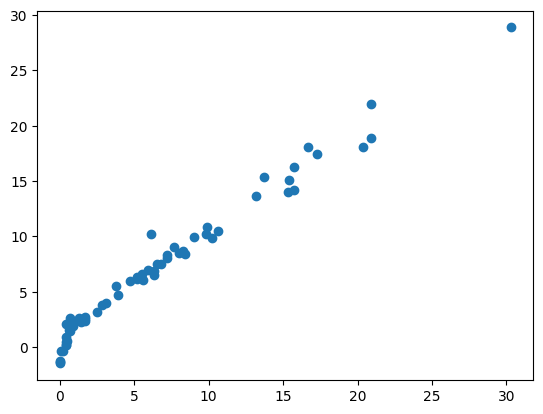

In [65]:
plt.scatter(y_test,y_pred)

## Ridge Regression Model

In [66]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

RidgeRegression = Ridge()

# Train the model
model = RidgeRegression.fit(Scaled_X_train, y_train)

# Predict on test data (use .predict)
y_pred = RidgeRegression.predict(Scaled_X_test)

# Evaluate the model
Mean_Absolute_Error = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print('Mean_Absolute_Error ->', Mean_Absolute_Error)
print('R2-Score ->', R2_Score)

Mean_Absolute_Error -> 0.9862070802884395
R2-Score -> 0.9616458508455313


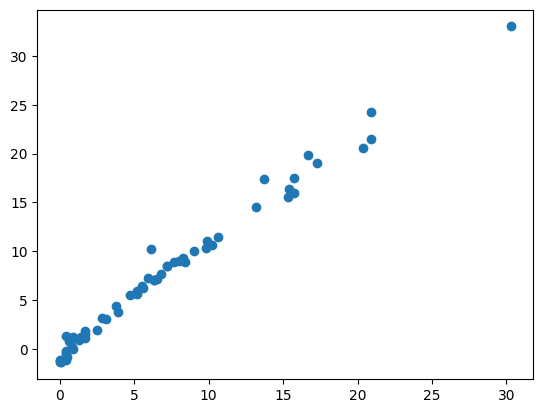

In [67]:
plt.scatter(y_test,y_pred)

## ElasticNet Regression Model

In [68]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

ElasticNet_Regression = ElasticNet()

# Train the model
model = ElasticNet_Regression.fit(Scaled_X_train, y_train)

# Predict on test data (use .predict)
y_pred = ElasticNet_Regression.predict(Scaled_X_test)

# Evaluate the model
Mean_Absolute_Error = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print('Mean_Absolute_Error ->', Mean_Absolute_Error)
print('R2-Score ->', R2_Score)

Mean_Absolute_Error -> 1.6511868133560943
R2-Score -> 0.9081701979826985


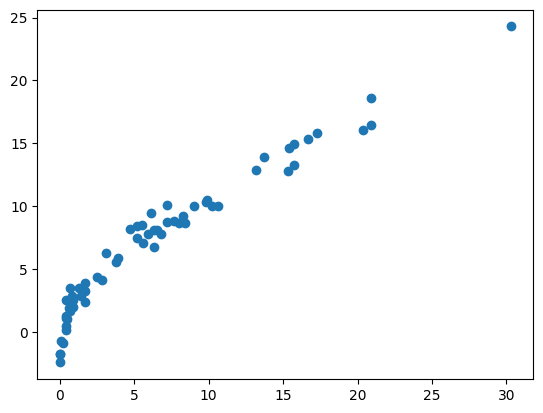

In [69]:
plt.scatter(y_test,y_pred)

## Cross Validation with LassoCV

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1641: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(


Best alpha (λ): 0.033216911748928005
Mean Absolute Error: 0.4207314208345752
R2 Score: 0.9882488186747138


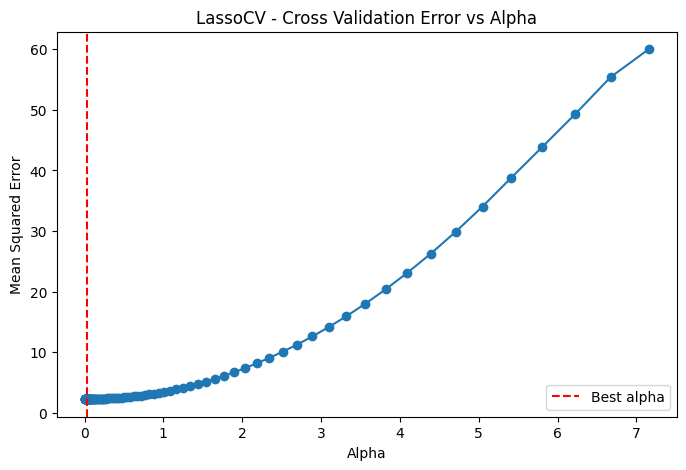

In [70]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for regularized regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize LassoCV with cross-validation (say 5-fold)
lasso_cv = LassoCV(alphas=None, cv=5, random_state=42)

# Train the model
lasso_cv.fit(X_train_scaled, y_train)

# Best alpha (λ) found using cross-validation
print("Best alpha (λ):", lasso_cv.alpha_)

# Predict and evaluate
y_pred = lasso_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

## Visualizing performance

plt.figure(figsize=(8, 5))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=-1), marker='o')
plt.axvline(lasso_cv.alpha_, color='r', linestyle='--', label='Best alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('LassoCV - Cross Validation Error vs Alpha')
plt.legend()
plt.show()
